# 线性回归
### 线性回归是什么？

线性回归（Linear Regression）是监督学习中最基础和最经典的算法之一。它的核心目标是找到一个线性模型，这个模型能够尽可能准确地预测一个或多个自变量（特征）与一个连续的因变量（目标值）之间的关系。

简单来说，如果我们将数据点绘制在图上，线性回归就是试图找到一条直线（在二维空间）或一个平面/超平面（在更高维空间），使其最佳地拟合这些数据点。



### 1. 模型的定义与公式

#### a. 标量形式
在具有 $d$ 个特征的数据集中，对于单个样本，线性模型可以表示为：

$$
\widehat{y}=\omega _1x_1+\omega _2x_2+\cdots \omega _dx_d+b
$$

这里：
*   $d$ 是特征的数量。
*   $x_j$ 是第 $j$ 个特征的值。
*   $\omega_j$ 是第 $j$ 个特征对应的权重（weight），它表示该特征对预测结果的重要性。
*   $b$ 是偏置项（bias）或截距（intercept），表示当所有特征都为0时，模型的基准预测值。
*   $\widehat{y}$ 是模型的预测值。

#### b. 向量形式
为了简化表示，我们可以将特征和权重分别写成向量形式。对于单个样本，其特征向量为 $\mathbf{x} = [x_1, x_2, \dots, x_d]^T$，权重向量为 $\mathbf{\omega} = [\omega_1, \omega_2, \dots, \omega_d]^T$。模型可以表示为：

$$
\widehat{y}=\mathbf{\omega }^{\mathrm{T}}\mathbf{x}+b
$$

其中 $\mathbf{\omega }^{\mathrm{T}}\mathbf{x}$ 是两个向量的点积。

#### c. 矩阵形式
当处理整个数据集时（假设有 $n$ 个样本），使用矩阵表示法会更加高效。我们将整个数据集的特征表示为一个矩阵 $\mathbf{X}$，其中每一行是一个样本，每一列是一个特征。

*   **设计矩阵 (Design Matrix) $\mathbf{X}$**:
    $$
    \mathbf{X} = \begin{pmatrix}
     x_{11} & x_{12} & \cdots & x_{1d} \\
     x_{21} & x_{22} & \cdots & x_{2d} \\
     \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & \cdots & x_{nd}
    \end{pmatrix}
    $$
    这是一个 $n \times d$ 的矩阵。

*   **权重向量 (Weight Vector) $\mathbf{\omega}$**:
    $$ \mathbf{\omega} = [\omega_1, \omega_2, \dots, \omega_d]^T $$
    这是一个 $d \times 1$ 的向量。

*   **预测向量 (Prediction Vector) $\widehat{\mathbf{y}}$**:
    $$ \widehat{\mathbf{y}} = [\widehat{y}_1, \widehat{y}_2, \dots, \widehat{y}_n]^T $$
    这是一个 $n \times 1$ 的向量，包含了对所有 $n$ 个样本的预测值。

此时，模型的矩阵形式为：
$$
\widehat{\mathbf{y}}=\mathbf{X\omega }+b
$$
注意这里的 $b$ 是一个标量，它会被广播（broadcast）加到向量 $\mathbf{X\omega}$ 的每一个元素上。

**一个简化技巧**：为了将偏置项 $b$ 也统一到矩阵乘法中，我们通常会对数据进行增广处理。具体做法是在特征矩阵 $\mathbf{X}$ 中增加一列全为1的向量，同时在权重向量 $\mathbf{\omega}$ 中增加偏置项 $b$ 作为其最后一个元素。

*   增广后的特征矩阵 $\mathbf{X}'$ ($n \times (d+1)$):
    $$
    \mathbf{X}' = \begin{pmatrix}
     x_{11} & \cdots & x_{1d} & 1 \\
     x_{21} & \cdots & x_{2d} & 1 \\
     \vdots & \ddots & \vdots & \vdots \\
     x_{n1} & \cdots & x_{nd} & 1
    \end{pmatrix}
    $$
*   增广后的权重向量 $\mathbf{\omega}'$ ($(d+1) \times 1$):
    $$ \mathbf{\omega}' = [\omega_1, \dots, \omega_d, b]^T $$

这样，模型就可以简化为：
$$
\widehat{\mathbf{y}} = \mathbf{X}'\mathbf{\omega}'
$$

在接下来的推导中，为了书写方便，我们默认使用增广后的 $\mathbf{X}$ 和 $\mathbf{\omega}$，模型即 $\widehat{\mathbf{y}} = \mathbf{X\omega}$。

---

### 2. 损失函数 (Loss Function)

模型的好坏需要一个指标来衡量。这个指标就是损失函数，它量化了模型的预测值 $\widehat{\mathbf{y}}$ 与真实值 $\mathbf{y}$之间的差距。对于回归问题，最常用的损失函数是**均方误差 (Mean Squared Error, MSE)**。

对于整个包含 $n$ 个样本的数据集，总损失 $L(\mathbf{\omega})$ 定义为所有样本的预测误差平方和：
$$
L(\mathbf{\omega}) = \sum_{i=1}^{n} (\widehat{y}_i - y_i)^2
$$
其中 $y_i$ 是第 $i$ 个样本的真实值。为了在求导时简化计算，我们通常会乘以一个常数 $\frac{1}{2}$ 或 $\frac{1}{2n}$，这不影响最优解的位置。我们采用 $\frac{1}{2}$ 的形式：
$$
L(\mathbf{\omega}) = \frac{1}{2} \sum_{i=1}^{n} (\widehat{y}_i - y_i)^2
$$
使用矩阵形式表示，损失函数可以写成：
$$
L(\mathbf{\omega}) = \frac{1}{2} || \widehat{\mathbf{y}} - \mathbf{y} ||_2^2 = \frac{1}{2} || \mathbf{X\omega} - \mathbf{y} ||_2^2
$$
其中 $||\cdot||_2^2$ 表示L2范数的平方，即向量中各元素平方和。这等价于：
$$
L(\mathbf{\omega}) = \frac{1}{2} (\mathbf{X\omega} - \mathbf{y})^T (\mathbf{X\omega} - \mathbf{y})
$$

---

### 3. 总体目标

线性回归的总体目标非常明确：**找到一组最优的权重参数 $\mathbf{\omega}^*$，使得损失函数 $L(\mathbf{\omega})$ 的值最小**。

用数学语言描述，就是求解一个最优化问题：
$$
\mathbf{\omega}^* = \arg\min_{\mathbf{\omega}} L(\mathbf{\omega}) = \arg\min_{\mathbf{\omega}} \frac{1}{2} || \mathbf{X\omega} - \mathbf{y} ||_2^2
$$
求解这个问题主要有两种方法：**解析解**和**数值解（如梯度下降）**。

---

### 4. 解析解 (Analytical Solution) 的推导

解析解，也称为正规方程 (Normal Equation)，是一种通过纯粹的数学推导直接给出最优解公式的方法。

**推导过程：**

1.  **写出损失函数**：
    $$
    L(\mathbf{\omega}) = \frac{1}{2} (\mathbf{X\omega} - \mathbf{y})^T (\mathbf{X\omega} - \mathbf{y})
    $$

2.  **展开表达式**：
    $$
    \begin{aligned}
    L(\mathbf{\omega}) &= \frac{1}{2} ((\mathbf{X\omega})^T - \mathbf{y}^T) (\mathbf{X\omega} - \mathbf{y}) \\
    &= \frac{1}{2} (\mathbf{\omega}^T\mathbf{X}^T - \mathbf{y}^T) (\mathbf{X\omega} - \mathbf{y}) \\
    &= \frac{1}{2} (\mathbf{\omega}^T\mathbf{X}^T\mathbf{X\omega} - \mathbf{\omega}^T\mathbf{X}^T\mathbf{y} - \mathbf{y}^T\mathbf{X\omega} + \mathbf{y}^T\mathbf{y})
    \end{aligned}
    $$
    注意到 $\mathbf{y}^T\mathbf{X\omega}$ 是一个标量，它的转置等于自身，即 $(\mathbf{y}^T\mathbf{X\omega})^T = \mathbf{\omega}^T\mathbf{X}^T\mathbf{y}$。因此，中间两项是相等的。
    $$
    L(\mathbf{\omega}) = \frac{1}{2} (\mathbf{\omega}^T\mathbf{X}^T\mathbf{X\omega} - 2\mathbf{\omega}^T\mathbf{X}^T\mathbf{y} + \mathbf{y}^T\mathbf{y})
    $$

3.  **对 $\mathbf{\omega}$ 求梯度**：
    为了找到最小值，我们需要对 $L(\mathbf{\omega})$ 关于 $\mathbf{\omega}$ 求梯度（导数），并令其为零。这里需要用到两个矩阵微积分的结论：
    *   $\frac{\partial (\mathbf{w}^T \mathbf{A} \mathbf{w})}{\partial \mathbf{w}} = (\mathbf{A} + \mathbf{A}^T)\mathbf{w}$。当 $\mathbf{A}$ 是对称矩阵时，等于 $2\mathbf{A}\mathbf{w}$。
    *   $\frac{\partial (\mathbf{a}^T \mathbf{w})}{\partial \mathbf{w}} = \frac{\partial (\mathbf{w}^T \mathbf{a})}{\partial \mathbf{w}} = \mathbf{a}$。

    在我们的损失函数中，$\mathbf{X}^T\mathbf{X}$ 是一个对称矩阵。因此，求导结果为：
    $$
    \begin{aligned}
    \nabla_{\mathbf{\omega}}L(\mathbf{\omega}) &= \frac{\partial L(\mathbf{\omega})}{\partial \mathbf{\omega}} \\
    &= \frac{1}{2} (2\mathbf{X}^T\mathbf{X}\mathbf{\omega} - 2\mathbf{X}^T\mathbf{y} + 0) \\
    &= \mathbf{X}^T\mathbf{X}\mathbf{\omega} - \mathbf{X}^T\mathbf{y}
    \end{aligned}
    $$

4.  **令梯度为零并求解**：
    $$
    \mathbf{X}^T\mathbf{X}\mathbf{\omega} - \mathbf{X}^T\mathbf{y} = 0
    $$
    移项可得：
    $$
    \mathbf{X}^T\mathbf{X}\mathbf{\omega} = \mathbf{X}^T\mathbf{y}
    $$
    最后，在 $\mathbf{X}^T\mathbf{X}$ 可逆的情况下，两边同乘以 $(\mathbf{X}^T\mathbf{X})^{-1}$，得到 $\mathbf{\omega}$ 的解析解：
    $$
    \mathbf{\omega}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
    $$
    这就是著名的**正规方程 (Normal Equation)**。

**解析解的优缺点**：
*   **优点**：无需选择学习率，一次计算即可得到最优解。
*   **缺点**：需要计算矩阵 $(\mathbf{X}^T\mathbf{X})$ 的逆。该矩阵的维度是 $(d+1) \times (d+1)$。矩阵求逆的计算复杂度大约是 $O(d^3)$。当特征数量 $d$ 非常大时（例如上万甚至百万），计算成本会极其高昂，甚至不可行。 此外，如果 $\mathbf{X}^T\mathbf{X}$ 是奇异矩阵（不可逆），则无法使用此方法。

---

### 5. 梯度下降 (Gradient Descent)

当解析解不可行时，我们可以使用迭代优化的方法，其中最常用的就是梯度下降。

**核心思想**：
梯度下降就像一个下山的过程。我们从参数空间的一个随机点（随机初始化 $\mathbf{\omega}$）开始，沿着当前位置**梯度最大**的**反方向**（即最陡峭的下坡方向）走一小步，然后在新位置重复此过程，直到走到山谷的最低点（即损失函数的最小值点）。

**a. (批量)梯度下降 (Batch Gradient Descent)**

批量梯度下降在每次更新参数时，都会使用**全部**的训练数据。

1.  **梯度**：我们已经推导出损失函数关于 $\mathbf{\omega}$ 的梯度：
    $$ \nabla_{\mathbf{\omega}}L(\mathbf{\omega}) = \mathbf{X}^T(\mathbf{X\omega} - \mathbf{y}) $$

2.  **更新规则**：在每一步迭代中，我们按照以下规则更新 $\mathbf{\omega}$：
    $$ \mathbf{\omega} := \mathbf{\omega} - \eta \nabla_{\mathbf{\omega}}L(\mathbf{\omega}) $$
    其中：
    *   `:=` 表示更新操作。
    *   $\eta$ (eta) 是**学习率 (Learning Rate)**，它控制着每一步走的“步长”。学习率过大可能导致在最低点附近震荡甚至发散；学习率过小则会导致收敛速度过慢。

**b. 随机梯度下降 (Stochastic Gradient Descent, SGD)**

批量梯度下降的缺点是，当数据集非常大（$n$ 很大）时，每次计算梯度都需要遍历所有样本，计算开销巨大。随机梯度下降为此提供了解决方案。

**核心思想**：
SGD 在每次更新时，不再使用全部数据，而是**随机地**从数据集中选择**一个**样本 $(x_i, y_i)$ 来计算梯度并更新参数。

1.  **单样本损失与梯度**：对于单个样本 $i$，损失为 $L_i(\mathbf{\omega}) = \frac{1}{2}(\widehat{y}_i - y_i)^2 = \frac{1}{2}(\mathbf{x}_i^T\mathbf{\omega} - y_i)^2$。（这里我们假设 $\mathbf{x}_i$ 和 $\mathbf{\omega}$ 已经增广）
    其梯度为：
    $$ \nabla_{\mathbf{\omega}}L_i(\mathbf{\omega}) = (\mathbf{x}_i^T\mathbf{\omega} - y_i)\mathbf{x}_i = (\widehat{y}_i - y_i)\mathbf{x}_i $$

2.  **更新规则**：（在每个迭代轮次中，对于随机选到的样本 $i$）
    $$ \mathbf{\omega} := \mathbf{\omega} - \eta (\widehat{y}_i - y_i)\mathbf{x}_i $$

**SGD的优缺点**：
*   **优点**：每次更新速度极快，计算开销小。其随机性有时反而有助于跳出局部最优解，找到更好的全局最优解。非常适合大规模数据集和在线学习场景。
*   **缺点**：由于每次只用一个样本，梯度估计的噪声很大，导致收敛过程非常不稳定，路径曲折。

**c. 小批量梯度下降 (Mini-batch Gradient Descent)**

这是对批量梯度下降和随机梯度下降的一种折中，也是目前实际应用中最广泛的方法。它在每次更新时，使用一小批（mini-batch，例如32、64、128个）随机样本来计算梯度。

**更新规则**：（对于一个大小为 $m$ 的小批量 $B$）
$$ \mathbf{\omega} := \mathbf{\omega} - \eta \frac{1}{m} \sum_{i \in B} (\widehat{y}_i - y_i)\mathbf{x}_i $$
它兼具了BGD的稳定性和SGD的高效性，是深度学习等领域进行优化的标准做法。

## 矢量加速

In [1]:
%matplotlib inline
import math

import numpy as np
import torch
from d2l import torch as d2l

In [2]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])
a, b

(tensor([1., 1., 1.,  ..., 1., 1., 1.]),
 tensor([1., 1., 1.,  ..., 1., 1., 1.]))

In [5]:
c = torch.zeros(n)
timer = d2l.Timer()
for i in range(n):
    c[i] = a[i] + b[i]

f'{timer.stop():.5f} sec'

'0.08017 sec'

In [8]:
timer.start()
d = a + b
f'{timer.stop():.17f} sec'

'0.00000000000000000 sec'

## 正态分布和平方损失
$$
p\left( x \right) =\frac{1}{\sqrt{2\pi \sigma ^2}}e^{\left( -\frac{1}{2\sigma ^2}\left( x-\mu \right) ^2 \right)}
$$


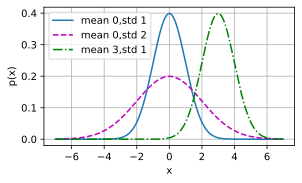

In [10]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi*sigma**2)
    return p * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))


x = np.arange(-7, 7, 0.01)
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu},std {sigma}' for mu, sigma in params])


1.  **线性回归模型与噪声假设:**
    我们考虑一个线性回归模型，其中输出 $y$ 是输入的特征向量 $\mathbf{x}$ 的线性组合，加上一个偏置项 $b$，再加上一个噪声项 $\epsilon$：
    $$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon$$
    这里的 $\mathbf{w}$ 是权重向量，$\mathbf{x}$ 是输入特征向量，$b$ 是偏置项。
    假设噪声 $\epsilon$ 服从均值为0，方差为 $\sigma^2$ 的高斯分布，表示为：
    $$\epsilon \sim \mathcal{N}(0, \sigma^2)$$

2.  **似然函数（Likelihood Function）:**
    基于上述噪声假设，我们可以推导出给定输入 $\mathbf{x}$ 时，观测到输出 $y$ 的概率密度函数。由于 $y - (\mathbf{w}^\top \mathbf{x} + b) = \epsilon$，我们可以将高斯分布的概率密度函数（PDF）应用于这个差值。
    对于单个数据点 $(\mathbf{x}, y)$，其似然函数为：
    $$P(y|\mathbf{x}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(y - \mathbf{w}^\top \mathbf{x} - b)^2\right)$$
    这个公式表示了在给定的 $\mathbf{x}$ 和模型参数 $\mathbf{w}, b, \sigma^2$ 下，观测到特定 $y$ 值的概率（或概率密度）。

3.  **数据集的联合似然:**
    假设我们有一组包含 $n$ 个独立同分布（i.i.d.）的数据点 $\{\mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^n$。由于数据点是独立的，整个数据集的联合似然是各个数据点似然的乘积：
    $$P(\mathbf{y}|\mathbf{X}) = \prod_{i=1}^n P(y^{(i)}|\mathbf{x}^{(i)}) = \prod_{i=1}^n \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2\right) \right)$$
    其中 $\mathbf{X} = \{\mathbf{x}^{(1)}, \ldots, \mathbf{x}^{(n)}\}$ 和 $\mathbf{y} = \{y^{(1)}, \ldots, y^{(n)}\}$。

4.  **极大似然估计（MLE）:**
    极大似然估计的目标是找到一组参数 $\mathbf{w}$ 和 $b$（以及 $\sigma^2$），使得观测到当前数据集的联合似然 $P(\mathbf{y}|\mathbf{X})$ 最大化。

5.  **对数似然与简化:**
    直接最大化乘积形式的似然函数（尤其是包含指数项时）通常比较困难。一个常用的技巧是对似然函数取对数，因为对数函数是单调递增的，最大化 $\log(P)$ 等价于最大化 $P$。
    $$ \log P(\mathbf{y}|\mathbf{X}) = \sum_{i=1}^n \left[ \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \frac{1}{2\sigma^2}(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2 \right] $$
    $$ \log P(\mathbf{y}|\mathbf{X}) = \sum_{i=1}^n \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \sum_{i=1}^n \frac{1}{2\sigma^2}(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2 $$
    $$ \log P(\mathbf{y}|\mathbf{X}) = n \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2 $$

6.  **最小化负对数似然:**
    在优化实践中，通常将最大化问题转化为最小化问题。最小化负对数似然 $-\log P(\mathbf{y}|\mathbf{X})$ 是等价于最大化对数似然的。
    $$ -\log P(\mathbf{y}|\mathbf{X}) = -n \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) + \frac{1}{2\sigma^2} \sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2 $$
    $$ -\log P(\mathbf{y}|\mathbf{X}) = n \log(\sqrt{2\pi\sigma^2}) + \frac{1}{2\sigma^2} \sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2 $$
    根据文本，这一项可以写为（与上述公式形式略有不同，但等价）：
    $$ -\log P(\mathbf{y}|\mathbf{X}) = \sum_{i=1}^n \frac{1}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2 $$
    这里 $\sum_{i=1}^n \frac{1}{2}\log(2\pi\sigma^2) = n \frac{1}{2}\log(2\pi\sigma^2) = n\log(\sqrt{2\pi\sigma^2})$，两种写法是完全一致的。

7.  **与均方误差（MSE）的联系:**
    现在关注需要最小化的目标函数：
    $$ \text{Objective} = \sum_{i=1}^n \frac{1}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2 $$
    *   **第一项**：$\sum_{i=1}^n \frac{1}{2}\log(2\pi\sigma^2)$ 是一个常数项，它不依赖于待优化的参数 $\mathbf{w}$ 和 $b$。因此，在最小化过程中，这一项可以被忽略。
    *   **第二项**：$\frac{1}{2\sigma^2} \sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2$ 是数据集中误差（或残差）平方和的一半，再乘以一个与 $\sigma^2$ 相关的常数 $\frac{1}{2\sigma^2}$。

    如果我们假设 $\sigma^2$ 是一个固定且已知（或不影响最优解）的常数，那么最小化目标函数就等价于最小化 $\sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2$。这个项正是**均方误差（MSE）**的分子（不乘以 $1/n$）。因此，最小化均方误差（或均方根误差）与在高斯噪声假设下对线性模型进行极大似然估计是等价的。

**总结:**
当假设线性回归模型的误差服从高斯分布时，通过极大似然估计找到模型参数的过程，最后归结为最小化观测值与模型预测值之间的平方差之和。这就是为什么均方误差损失函数在线性回归问题中如此普遍和自然的原因。

# 练习
好的，我们来逐一讲解这些关于线性回归的解析题。

### 1. 最小化平方误差与正态分布

**问题描述**: 假设我们有一些数据 $x_1, \ldots, x_n \in \mathbb{R}$。我们的目标是找到一个常数 $b$，使得最小化 $\sum_{i=1}^{n} (x_i - b)^2$。

**1.1 找到最优值 $b$ 的解析解**

为了找到使目标函数最小的 $b$，我们对目标函数关于 $b$ 求导，并令导数等于零。
设损失函数为 $L(b) = \sum_{i=1}^{n} (x_i - b)^2$。

求导：
$$
\frac{dL}{db} = \frac{d}{db} \sum_{i=1}^{n} (x_i - b)^2
$$
$$
\frac{dL}{db} = \sum_{i=1}^{n} \frac{d}{db} (x_i - b)^2
$$
$$
\frac{dL}{db} = \sum_{i=1}^{n} 2(x_i - b)(-1)
$$
$$
\frac{dL}{db} = -2 \sum_{i=1}^{n} (x_i - b)
$$

令导数等于零以找到极值点：
$$
-2 \sum_{i=1}^{n} (x_i - b) = 0
$$
$$
\sum_{i=1}^{n} (x_i - b) = 0
$$
$$
\sum_{i=1}^{n} x_i - \sum_{i=1}^{n} b = 0
$$
$$
\sum_{i=1}^{n} x_i - nb = 0
$$
$$
nb = \sum_{i=1}^{n} x_i
$$
$$
b = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
因此，最优值 $b$ 是数据点 $x_i$ 的均值（平均值）。

**1.2 这个问题及其解与正态分布有什么关系？**

这个最小二乘问题与正态分布（高斯分布）有着密切的关系。如果我们假设每个数据点 $x_i$ 是由一个潜在的真实值（例如 $b$）加上服从零均值、独立同方差 $\sigma^2$ 的正态分布噪声 $\epsilon_i$ 产生的，即 $x_i = b + \epsilon_i$，其中 $\epsilon_i \sim N(0, \sigma^2)$。

正态分布的概率密度函数 (PDF) 为：
$$
p(\epsilon) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\epsilon^2}{2\sigma^2}\right)
$$
因此，对于单个数据点 $x_i$ 观测到的概率（在给定 $b$ 和 $\sigma^2$ 的情况下）是：
$$
p(x_i | b, \sigma^2) = p(\epsilon_i = x_i - b) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - b)^2}{2\sigma^2}\right)
$$

假设数据点是独立同分布的，那么观测到所有数据 $x_1, \ldots, x_n$ 的似然函数为：
$$
P(x_1, \ldots, x_n | b, \sigma^2) = \prod_{i=1}^{n} p(x_i | b, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - b)^2}{2\sigma^2}\right)
$$
$$
P(x_1, \ldots, x_n | b, \sigma^2) = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \exp\left(-\sum_{i=1}^{n} \frac{(x_i - b)^2}{2\sigma^2}\right)
$$

最大似然估计 (MLE) 的目标是找到使似然函数最大的参数 $b$ 和 $\sigma^2$。最大化似然函数等价于最大化对数似然函数：
$$
\log P(x_1, \ldots, x_n | b, \sigma^2) = n \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \sum_{i=1}^{n} \frac{(x_i - b)^2}{2\sigma^2}
$$
$$
\log P(x_1, \ldots, x_n | b, \sigma^2) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - b)^2
$$

要最大化这个对数似然函数关于 $b$ 的值，我们只需要最小化 $\sum_{i=1}^{n} (x_i - b)^2$ 部分（因为 $-\frac{1}{2\sigma^2}$ 是一个负的常数因子，而 $-\frac{n}{2}\log(2\pi\sigma^2)$ 对于 $b$ 来说是常数）。

因此，最小化 $\sum_{i=1}^{n} (x_i - b)^2$ 的问题，正是假设噪声服从正态分布时，通过最大似然估计方法求解参数 $b$ 的过程。其解 $b = \frac{1}{n}\sum x_i$ 是数据样本的均值。

---

### 2. 平方误差线性回归的解析解

**问题描述**: 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置 $b$（我们可以通过向 $X$ 添加所有值为 1 的一列来做到这一点）。

假设我们有一个模型 $y = Xw$，其中 $y$ 是目标向量，$X$ 是包含一个全 1 列（用于截距项）以及其他特征的矩阵，$w$ 是权重向量。

**2.1 用矩阵和向量表示法写出优化问题**

我们要最小化的损失函数是平方误差和 (Sum of Squared Errors, SSE)，也称为 $L_2$ 损失。
设 $y \in \mathbb{R}^n$ 是目标向量，$X \in \mathbb{R}^{n \times (d+1)}$ 是特征矩阵（$n$ 个样本，$d$ 个特征 + 1 个截距），$w \in \mathbb{R}^{d+1}$ 是权重向量。

预测值为 $\hat{y} = Xw$。
误差向量为 $e = y - \hat{y} = y - Xw$。

损失函数 $J(w)$ 是误差向量的欧几里得范数的平方：
$$
J(w) = ||e||^2 = ||y - Xw||^2
$$
在矩阵形式下，它可以展开为：
$$
J(w) = (y - Xw)^T (y - Xw)
$$
$$
J(w) = (y^T - w^T X^T)(y - Xw)
$$
$$
J(w) = y^T y - y^T Xw - w^T X^T y + w^T X^T Xw
$$
由于 $y^T Xw$ 是一个标量，所以 $(y^T Xw)^T = y^T Xw$。同时，$w^T X^T y = (y^T Xw)^T$。因此，$y^T Xw = w^T X^T y$。
$$
J(w) = y^T y - 2 w^T X^T y + w^T X^T Xw
$$
(注意：在推导中，常写成 $-2 w^T X^T y$ 而不是 $-2 y^T Xw$，这是为了保持 $w$ 在中间)。

**2.2 计算损失对 $w$ 的梯度**

使用矩阵求导法则，我们对 $J(w)$ 关于 $w$ 求梯度：
$$
\frac{\partial J(w)}{\partial w} = \frac{\partial}{\partial w} (y^T y) - \frac{\partial}{\partial w} (2 w^T X^T y) + \frac{\partial}{\partial w} (w^T X^T Xw)
$$
我们知道：
*   $\frac{\partial}{\partial w} (c) = 0$ （常数）
*   $\frac{\partial}{\partial w} (a^T w) = a$
*   $\frac{\partial}{\partial w} (w^T A w) = 2Aw$ （当 $A$ 对称时， $X^T X$ 是对称的）

应用这些法则：
$$
\frac{\partial J(w)}{\partial w} = 0 - 2 (X^T y) + 2 (X^T X) w
$$
$$
\nabla_w J(w) = 2 X^T X w - 2 X^T y
$$

**2.3 通过将梯度设为 0，求解矩阵方程来找到解析解**

为了找到最小化损失函数 $J(w)$ 的权重向量 $w$，我们将梯度设为零：
$$
2 X^T X w - 2 X^T y = 0
$$
$$
X^T X w = X^T y
$$
为了唯一地解出 $w$，我们需要矩阵 $(X^T X)$ 是可逆的（即满秩）。在这种情况下，我们可以两边同时左乘 $(X^T X)^{-1}$：
$$
(X^T X)^{-1} (X^T X) w = (X^T X)^{-1} X^T y
$$
$$
I w = (X^T X)^{-1} X^T y
$$
$$
w = (X^T X)^{-1} X^T y
$$
这就是线性回归问题的解析解，也称为**正规方程 (Normal Equation)**。

**2.4 什么时候可能比使用随机梯度下降（SGD）更好？这种方法何时会失效？**

**何时比 SGD 更好：**

1.  **数据集较小**: 当样本数量 $n$ 和特征数量 $d$ 相对较小时，计算 $(X^T X)^{-1}$ 是可行且高效的。计算量主要在于矩阵乘法和求逆，其复杂度大致为 $O(nd^2 + d^3)$。对于小到中等规模的数据集，这通常比 SGD 需要的（可能很多次的）迭代更新更快收敛到精确解。
2.  **无需调整超参数**: 正规方程提供了一个直接的解析解，不需要像 SGD 那样调整学习率、批量大小、迭代次数等超参数。
3.  **保证全局最优**: 如果 $X^T X$ 可逆，正规方程直接给出了损失函数的全局最小值。SGD 是一个迭代优化过程，可能会收敛到全局最小值附近，但可能需要仔细调参才能达到很高的精度，并且可能受到局部最小值（尽管对于线性回归的 SSE 目标函数，局部最小值不存在）或鞍点的困扰（尽管在其他模型中）。

**何时失效或存在问题：**

1.  **数据集非常大**: 当样本量 $n$ 或特征维度 $d$ 非常大时，计算 $X^T X$（维度为 $(d+1) \times (d+1)$）及其逆矩阵的计算成本会变得非常高昂，内存需求也很大。矩阵求逆的计算复杂度是 $O(d^3)$，这对于高维数据是难以承受的。
2.  **特征高度相关（多重共线性）**: 如果特征之间存在高度线性相关性，矩阵 $X^T X$ 将会是奇异的（不可逆的），或者接近奇异。在这种情况下，$(X^T X)^{-1}$ 无法计算，或者计算结果非常不稳定，导致模型参数的估计有很大的不确定性。这时，正规方程就会失效。
3.  **特征维度大于样本数量 ($d > n$)**: 在这种情况下，$X^T X$ 矩阵（$(d+1) \times (d+1)$ 维度）的秩最多为 $n$，因此它肯定不是满秩的，$(X^T X)^{-1}$ 不存在。

在现代机器学习中，尤其是处理大数据集时，SGD 及其变种（如 Adam, RMSprop）通常是更受欢迎的选择，因为它们能够处理大规模数据，并且在高维、共线性问题上通过一些正则化技术（如 L1, L2 正则化）可以更有效地工作。

---

### 3. 指数分布噪声下的线性回归

**问题描述**: 假设控制附加噪声 $\epsilon$ 的噪声模型是指数分布。也就是说，$p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$。

**3.1 写出模型 $-\log P(y | X)$ 下数据的负对数似然**

模型是 $y_i = w^T x_i + \epsilon_i$，其中 $\epsilon_i$ 服从具有均值为 0 的对称指数分布（也称为双指数分布）。
其概率密度函数 (PDF) 为：
$$
p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)
$$
所以，对于单个样本 $(x_i, y_i)$，给定 $w$ 和 $x_i$，观测到 $y_i$ 的概率密度是：
$$
p(y_i | x_i, w) = p(\epsilon_i = y_i - w^T x_i) = \frac{1}{2} \exp\left(-\left|y_i - w^T x_i\right|\right)
$$
假设样本之间是独立同分布的，观测到所有数据 $(X, y)$ 的似然函数是：
$$
P(y | X, w) = \prod_{i=1}^{n} p(y_i | x_i, w) = \prod_{i=1}^{n} \frac{1}{2} \exp\left(-\left|y_i - w^T x_i\right|\right)
$$
对数似然函数是：
$$
\log P(y | X, w) = \sum_{i=1}^{n} \log\left(\frac{1}{2} \exp\left(-\left|y_i - w^T x_i\right|\right)\right)
$$
$$
\log P(y | X, w) = \sum_{i=1}^{n} \left( \log\left(\frac{1}{2}\right) - \left|y_i - w^T x_i\right| \right)
$$
$$
\log P(y | X, w) = n \log\left(\frac{1}{2}\right) - \sum_{i=1}^{n} \left|y_i - w^T x_i\right|
$$
数据的负对数似然 (Negative Log-Likelihood, NLL) 是：
$$
-\log P(y | X, w) = - n \log\left(\frac{1}{2}\right) + \sum_{i=1}^{n} \left|y_i - w^T x_i\right|
$$
$$
-\log P(y | X, w) = n \log(2) + \sum_{i=1}^{n} \left|y_i - w^T x_i\right|
$$
最小化负对数似然等价于最小化 $\sum_{i=1}^{n} |y_i - w^T x_i|$。这正是 **L1 回归**或 **最小绝对偏差 (Least Absolute Deviations, LAD)** 问题。

**3.2 请试着写出解析解**

要找到最小化 $L(w) = \sum_{i=1}^{n} |y_i - w^T x_i|$ 的 $w$，我们需要考虑绝对值函数的性质。绝对值函数 $|u|$ 在 $u=0$ 处是不可导的（导数在 $u \to 0^+$ 时为 1，在 $u \to 0^-$ 时为 -1）。
然而，我们可以使用**次梯度 (subgradient)** 的概念。函数 $f(u) = |u|$ 的次梯度 $g$ 满足：
$g = \begin{cases} 1 & \text{if } u > 0 \\ -1 & \text{if } u < 0 \\ \text{any value in } [-1, 1] & \text{if } u = 0 \end{cases}$
我们可以将其表示为 $g = \text{sgn}(u)$，其中 $\text{sgn}(u)$ 是符号函数，在 $u=0$ 处取值为 0（或者是一个定义在 $-1$ 到 $1$ 之间的值，取决于具体的优化算法）。

因此，损失函数 $L(w)$ 关于 $w$ 的次梯度是：
$$
\partial_w L(w) = \sum_{i=1}^{n} \text{sgn}(y_i - w^T x_i) x_i
$$
（这里我们假设 $\text{sgn}(0)$ 的选择不影响最终最优解的确定性，或者在优化时会有特殊处理）。

要找到最优解，我们将次梯度设为零向量：
$$
\sum_{i=1}^{n} \text{sgn}(y_i - w^T x_i) x_i = 0
$$
这个方程与线性回归（L2 损失）的方程 $X^T X w = X^T y$ 不同。因为 $\text{sgn}$ 函数依赖于 $w$ 的值（通过 $y_i - w^T x_i$ 的符号），这个方程通常不像 L2 回归那样可以容易地通过矩阵求逆得到一个封闭形式的解析解 $w = (X^T X)^{-1} X^T y$。

**结论**: L1 回归（最小绝对偏差）通常没有简单的、直接的解析解，需要依赖迭代优化算法来求解。

**3.3 提出一种随机梯度下降（SGD）算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）**

**SGD 算法**:

1.  **初始化**: 随机初始化权重向量 $w$（例如，所有元素置零或从小的随机值开始）。
2.  **学习率**: 选择一个学习率 $\alpha > 0$。通常需要一个学习率衰减策略（例如，$\alpha_t = \frac{\alpha_0}{1+kt}$）。
3.  **迭代更新**:
    *   在一个 epoch 内，可以遍历所有样本 $(x_i, y_i)$。
    *   对于每个样本 $i$：
        *   计算预测值：$\hat{y}_i = w^T x_i$。
        *   计算误差：$err_i = y_i - \hat{y}_i$。
        *   计算 L1 损失的子梯度：
            *   如果 $err_i > 0$，则 $\text{sgn}(err_i) = 1$。
            *   如果 $err_i < 0$，则 $\text{sgn}(err_i) = -1$。
            *   如果 $err_i = 0$，通常选择 $\text{sgn}(0) = 0$ 来避免更新，或者随机选择一个 [-1, 1] 之间的值，或者也设为 0（这取决于具体的实现和算法变种）。这里我们选取 $\text{sgn}(0) = 0$ 进行讨论。
        *   计算样本的次梯度：$\partial_i L(w) = \text{sgn}(err_i) x_i$。
        *   更新权重：$w \leftarrow w - \alpha \cdot \text{sgn}(err_i) x_i$。

**可能出错的地方（提示：驻点附近的情况）**:

1.  **零点的不可导性与震荡**:
    *   **驻点**: 所谓的“驻点”对于 L1 损失是次梯度的零点。这意味着 $\sum_{i=1}^{n} \text{sgn}(y_i - w^T x_i) x_i = 0$。
    *   **问题**: L1 损失的梯度（或次梯度）是阶跃函数。当 $y_i - w^T x_i$ 接近于 0 时，$\text{sgn}(y_i - w^T x_i)$ 的值会从 -1 突然跳到 1（或者相反）。
    *   **在驻点附近**: 如果当前 $w$ 使得 $y_i - w^T x_i$ 对于某些样本非常接近 0，那么在 SGD 更新过程中，这些样本的梯度可能会在 $x_i$ 和 $-x_i$ 之间剧烈切换。
    *   **情况**: 如果一个样本的 $y_i - w^T x_i$ 变为 0，而我们选择 $\text{sgn}(0)=0$，那么该样本不再更新 $w$。但如果之后 $w$ 的微小变化使得 $y_i - w^T x_i$ 变为一个非常小但不为零的值，其符号又会突然改变。
    *   **结果**: 即使是在全局最小值附近，SGD 也可能因为这些梯度跳变而导致参数 $w$ 围绕最优解发生**震荡 (oscillation)**，而不是平滑地收敛到精确值。如果学习率 $\alpha$ 足够小，并且是衰减的，震荡的幅度可能会减小，但可能永远不会完全停止。
    *   **收敛的定义**: 对于 L1 回归，收敛可能意味着参数进入一个使次梯度包含零向量的“区域”，而不是精确地落在某一点。

2.  **学习率的选择**:
    *   如果学习率过大，即使在非驻点区域，也可能导致参数在最优值附近大幅度跳过，难以收敛。
    *   如果学习率过小，收敛过程会非常缓慢。

3.  **样本顺序的影响**:
    *   SGD 的更新路径对样本的顺序非常敏感。不同的样本顺序可能导致不同的收敛行为和最终的解。

4.  **批次大小**:
    *   纯粹的 SGD（批量大小为 1）对噪声最敏感。使用小批量 SGD（Mini-batch SGD）可以平滑梯度，减少震荡，提高稳定性，但会增加计算复杂度（每个更新步骤需要处理一个批次）。

**总结**: L1 回归的 SGD 算法在处理不可导点时需要特别小心。即使成功收敛，也可能在最优解附近出现震荡，这与 L2 回归的平滑收敛行为有所不同。关键在于如何有效地处理 $\text{sgn}(0)$ 的情况以及如何选择合适的学习率衰减策略来减小震荡并最终找到一个接近最优的解。